<a href="https://colab.research.google.com/github/tanmay023/GREEN-SKILL-AND-AI/blob/main/day6_4_shell_india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [28]:
df = pd.read_csv('emissions_reduction_data.csv')

In [29]:
print(df)

      energy_efficiency  renewable_ratio  technology_cost  emission_reduction
0             68.727006         0.373641      7569.984799                   0
1             97.535715         0.332912      2660.607960                   0
2             86.599697         0.176154      4119.757249                   0
3             79.932924         0.607267      6969.525732                   1
4             57.800932         0.476624      5338.804101                   0
...                 ...              ...              ...                 ...
9995          92.882799         0.877039      9570.479053                   0
9996          94.875442         0.046814      7730.417901                   0
9997          97.335396         0.303698      1175.102765                   0
9998          69.874400         0.443320      4609.043582                   0
9999          60.857020         0.172265      3316.581812                   0

[10000 rows x 4 columns]


In [30]:
df.head()

,energy_efficiency,renewable_ratio,technology_cost,emission_reduction
0,68.727006,0.373641,7569.984799,0
1,97.535715,0.332912,2660.607960,0
2,86.599697,0.176154,4119.757249,0
3,79.932924,0.607267,6969.525732,1
4,57.800932,0.476624,5338.804101,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   energy_efficiency   10000 non-null  float64
 1   renewable_ratio     10000 non-null  float64
 2   technology_cost     10000 non-null  float64
 3   emission_reduction  10000 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 312.6 KB


In [32]:
df.isna()

,energy_efficiency,renewable_ratio,technology_cost,emission_reduction
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
9995,False,False,False,False
9996,False,False,False,False
9997,False,False,False,False
9998,False,False,False,False


In [33]:
df.isna().sum()

,0
energy_efficiency,0
renewable_ratio,0
technology_cost,0
emission_reduction,0


In [34]:
df.describe()

,energy_efficiency,renewable_ratio,technology_cost,emission_reduction
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,74.707978,0.504530,5500.453551,0.167900
std,14.381506,0.289295,2580.963816,0.373796
min,50.000582,0.000158,1000.433115,0.000000
25%,62.316443,0.253946,3283.731200,0.000000
50%,74.626431,0.505897,5518.612852,0.000000
75%,87.000317,0.756479,7702.064686,0.000000
max,99.985884,0.999925,9999.108793,1.000000


In [35]:
df.describe()

,energy_efficiency,renewable_ratio,technology_cost,emission_reduction
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,74.707978,0.504530,5500.453551,0.167900
std,14.381506,0.289295,2580.963816,0.373796
min,50.000582,0.000158,1000.433115,0.000000
25%,62.316443,0.253946,3283.731200,0.000000
50%,74.626431,0.505897,5518.612852,0.000000
75%,87.000317,0.756479,7702.064686,0.000000
max,99.985884,0.999925,9999.108793,1.000000


In [36]:
df.columns

Index(['energy_efficiency', 'renewable_ratio', 'technology_cost',
       'emission_reduction'],
      dtype='object')

In [37]:
df.dtypes

,0
energy_efficiency,float64
renewable_ratio,float64
technology_cost,float64
emission_reduction,int64


In [38]:
x = df[['energy_efficiency','renewable_ratio','technology_cost']]
y = df['emission_reduction']

In [39]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

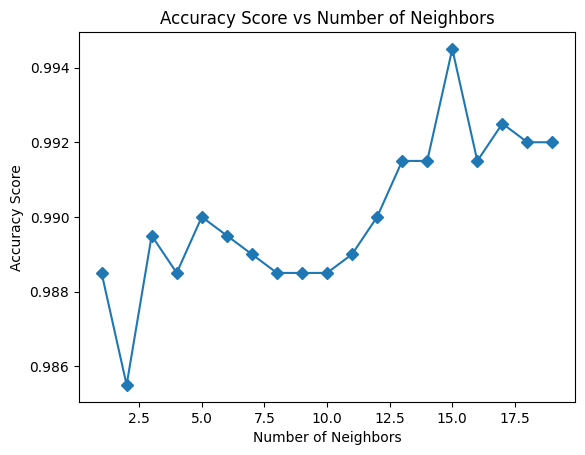

In [45]:
from sklearn.metrics import accuracy_score

accuracies = []
k_values = range(1,20)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test,y_pred))

plt.plot(k_values,accuracies,marker='D')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs Number of Neighbors')
plt.show()

In [46]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [49]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)
print('Accuracy(%):',accuracy*100,'%')


Accuracy: 0.99
Accuracy(%): 99.0 %


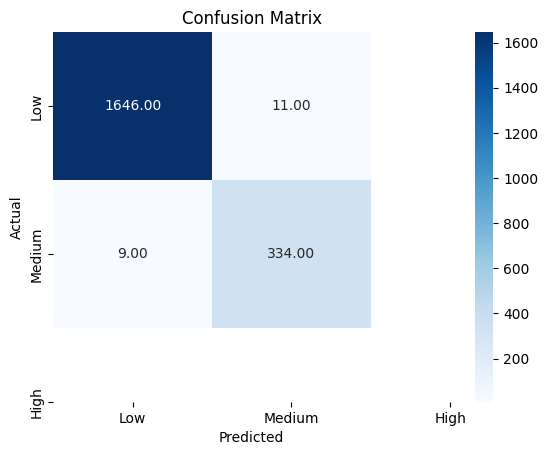

In [59]:
confusion_matrix = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot=True,cmap='Blues',fmt='.2f',xticklabels=['Low','Medium','High'],yticklabels=['Low','Medium','High'])
plt.title('Confusion Matrix')
plt.show()

In [60]:
classification_report = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
print(classification_report)

Predicted     0    1
Actual              
0          1646   11
1             9  334
